In [1]:
import sys, pathlib

ROOT = pathlib.Path.cwd().resolve().parents[0]
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [ ]:
%load_ext memory_profiler

import numpy as np
import psutil, os, time, datetime
import matplotlib.pyplot as plt
import torch

import importlib
from experiments._utils import mem_funcs
from memory_profiler import memory_usage

import os, time, threading, psutil, matplotlib.pyplot as plt
from experiments._utils.mem_funcs import allocate_array
importlib.reload(mem_funcs);

In [3]:
import psutil, os, time, numpy as np, torch, matplotlib.pyplot as plt

SAMPLING = 0.05
proc = psutil.Process(os.getpid())

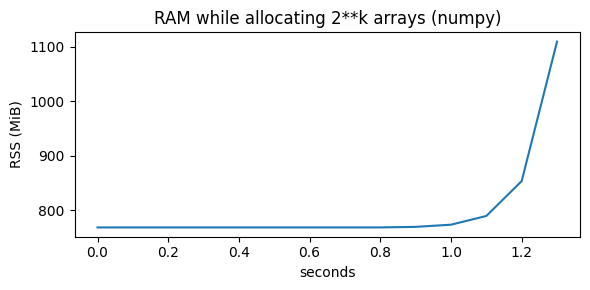

In [9]:

SAMPLING = 0.1                   
proc = psutil.Process(os.getpid()) 

def current_rss_mb():
    rss = proc.memory_info().rss
    for child in proc.children(recursive=True):
        rss += child.memory_info().rss
    return rss / 1024**2 

def sample_and_plot(power_max=13, backend="numpy"):
    samples = []
    stop = False
 
    def _poll():
        while not stop:
            samples.append(current_rss_mb())
            time.sleep(SAMPLING)

    t = threading.Thread(target=_poll, daemon=True)
    t.start()

    arrays = allocate_arrays(power_max, backend, touch=True, pause=SAMPLING)

    stop = True
    t.join()
    x = [SAMPLING * i for i in range(len(samples))]
    plt.figure(figsize=(6,3))
    plt.plot(x, samples)
    plt.xlabel("seconds"); plt.ylabel("RSS (MiB)")
    plt.title(f"RAM while allocating 2**k arrays ({backend})")
    plt.tight_layout(); plt.show()

    return arrays     


arrays_np = sample_and_plot(power_max=13, backend="numpy")



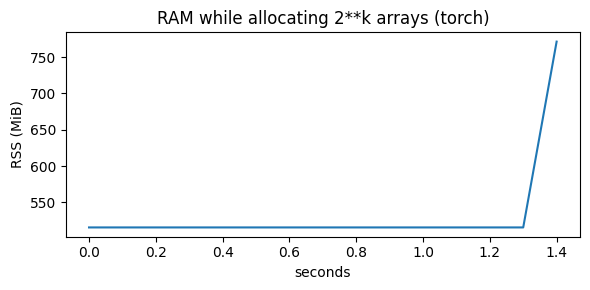

In [10]:
arrays_np = sample_and_plot(power_max=13, backend="torch")

In [8]:
%mprun -f mem_funcs.allocate_arrays mem_funcs.allocate_arrays(power_max=13, backend="numpy")

Filename: C:\Users\simbarashe.timire\Documents\Projects\lab\experiments\_utils\mem_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    767.0 MiB    767.0 MiB           1   def allocate_arrays(power_max=17, backend="numpy", touch=True, pause=0.0):
     4                                             """
     5                                             Allocate (2**k x 2**k) float32 tensors for k = 0..power_max.
     6                                             If *touch* is True we write to every element so pages are committed.
     7                                             *pause* inserts a small sleep after each allocation so external samplers
     8                                             can catch every step. Returns the list so caller keeps them alive.
     9                                             """
    10    767.0 MiB      0.0 MiB           1       arrs = []
    11   1108.1 MiB      0.0 MiB          15       for k in range(power_max + 

In [7]:
%mprun -f mem_funcs.allocate_arrays mem_funcs.allocate_arrays(power_max=13, backend="torch")


Filename: C:\Users\simbarashe.timire\Documents\Projects\lab\experiments\_utils\mem_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    425.1 MiB    425.1 MiB           1   def allocate_arrays(power_max=17, backend="numpy", touch=True, pause=0.0):
     4                                             """
     5                                             Allocate (2**k x 2**k) float32 tensors for k = 0..power_max.
     6                                             If *touch* is True we write to every element so pages are committed.
     7                                             *pause* inserts a small sleep after each allocation so external samplers
     8                                             can catch every step. Returns the list so caller keeps them alive.
     9                                             """
    10    425.1 MiB      0.0 MiB           1       arrs = []
    11    766.6 MiB      0.0 MiB          15       for k in range(power_max + 